In [24]:
# the imports:

# pandas for handling the data
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# Seaborn is a Python data visualization library that offers a user-friendly interface 
#    for generating visually appealing and informative statistical graphics.
import seaborn as sns

# From sklearn we import some classes and functions for data handling, the tree classifier, 
#    the accuracy and the plot function to depict the tree  
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.tree import plot_tree 

# This class we use it to search exhaustive over specified parameter values for an estimator.
from sklearn.model_selection import GridSearchCV 


In [27]:
# your code here
import pandas as pd
df_iris = pd.read_csv('iris_teach_2.csv')
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [30]:
# your code here
df_iris.isnull().sum()

sepal length (cm)    1
sepal width (cm)     1
petal length (cm)    0
petal width (cm)     1
iris_name            1
dtype: int64

In [35]:
# your code here
df_iris.dropna(inplace=True)
df_iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
iris_name            0
dtype: int64

In [37]:
# your code here
X = df_iris.drop('iris_name', axis=1)
y = df_iris['iris_name']

print(X)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
148                6.7               3.0                5.2               2.3
149                6.3               2.5                5.0               1.9
150                6.5               3.0                5.2               2.0
151                6.2               3.4                5.4               2.3
152                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [41]:
# your code here
le = LabelEncoder()
le.fit(y)
y = le.transform(y)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [43]:
# your code here
#Divide the dataset in a training and a testing set with the function train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [46]:
# Create a decision tree classifier object 
tree_clf = DecisionTreeClassifier(criterion='entropy', random_state=42) 
# Fit the classifier to the training data 
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [48]:
# Make predictions on the test set 
y_pred = tree_clf.predict(X_test) 
# Calculate the accuracy of the model 
accuracy = accuracy_score(y_test, y_pred) 
print("Accuracy: {:.2f}".format(accuracy))

Accuracy: 0.97


[Text(0.4, 0.9166666666666666, 'X[2] <= 2.6\nentropy = 1.581\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(0.3, 0.75, 'entropy = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.5, 0.75, 'X[3] <= 1.65\nentropy = 0.995\nsamples = 81\nvalue = [0, 37, 44]'),
 Text(0.2, 0.5833333333333334, 'X[2] <= 4.95\nentropy = 0.469\nsamples = 40\nvalue = [0, 36, 4]'),
 Text(0.1, 0.4166666666666667, 'entropy = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(0.3, 0.4166666666666667, 'X[0] <= 6.05\nentropy = 0.722\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(0.2, 0.25, 'X[1] <= 2.45\nentropy = 1.0\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.1, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.3, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.4, 0.25, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.5833333333333334, 'X[2] <= 4.85\nentropy = 0.165\nsamples = 41\nvalue = [0, 1, 40]'),
 Text(0.7, 0.4166666666666667, 'X[1] <= 3.1\nentropy =

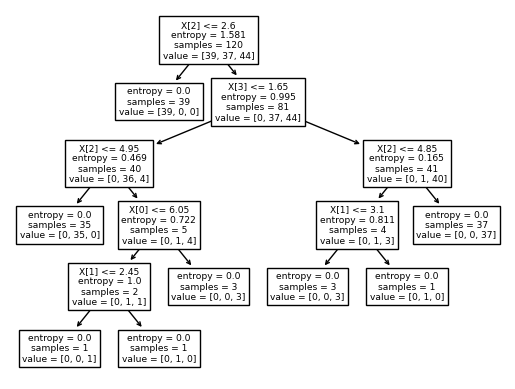

In [50]:
# Visualize the decision tree 
plot_tree(tree_clf)

In [52]:
# Define the hyperparameters to search over 
param_grid = {"max_depth": [1, 2, 3, 4, 5, 6, 7]} 
# Create a grid search object 
grid_search = GridSearchCV(tree_clf, param_grid, cv=5) 
# Fit the grid search object to the training data 
grid_search.fit(X_train, y_train) 
# Print the best hyperparameters found by the grid search 
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'max_depth': 4}


In [55]:
# Create a new decision tree classifier object with the best hyperparameters 
tree_clf_tuned = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42) 
# Fit the classifier to the training data 
tree_clf_tuned.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

[Text(0.4, 0.8333333333333334, 'X[2] <= 2.6\nentropy = 1.581\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.6, 0.5, 'X[3] <= 1.65\nentropy = 0.995\nsamples = 81\nvalue = [0, 37, 44]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.469\nsamples = 40\nvalue = [0, 36, 4]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.165\nsamples = 41\nvalue = [0, 1, 40]')]

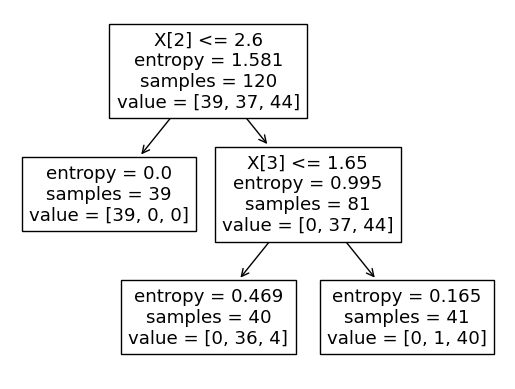

In [57]:
# Visualize the decision tree 
plot_tree(tree_clf_tuned)

In [60]:
df_clean_iris_set = X.copy()
df_clean_iris_set['iris_name']=y
df_clean_iris_set.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris_name
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

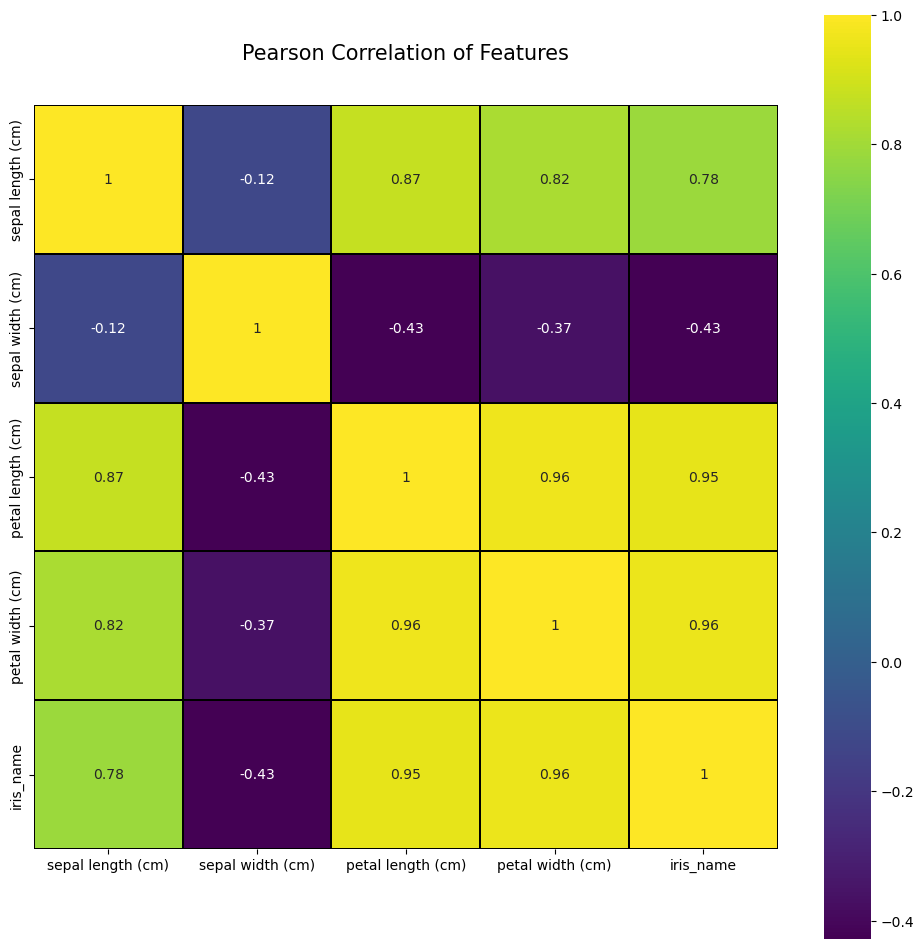

In [62]:
import seaborn as sns
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df_clean_iris_set.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='black', annot=True)

[Text(0.36363636363636365, 0.95, 'X[2] <= 2.6\nentropy = 1.581\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(0.2727272727272727, 0.85, 'entropy = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.45454545454545453, 0.85, 'X[2] <= 4.75\nentropy = 0.995\nsamples = 81\nvalue = [0, 37, 44]'),
 Text(0.2727272727272727, 0.75, 'X[0] <= 4.95\nentropy = 0.196\nsamples = 33\nvalue = [0, 32, 1]'),
 Text(0.18181818181818182, 0.65, 'X[2] <= 3.9\nentropy = 1.0\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.09090909090909091, 0.55, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.2727272727272727, 0.55, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.36363636363636365, 0.65, 'entropy = 0.0\nsamples = 31\nvalue = [0, 31, 0]'),
 Text(0.6363636363636364, 0.75, 'X[2] <= 5.15\nentropy = 0.482\nsamples = 48\nvalue = [0, 5, 43]'),
 Text(0.5454545454545454, 0.65, 'X[0] <= 6.65\nentropy = 0.852\nsamples = 18\nvalue = [0, 5, 13]'),
 Text(0.45454545454545453, 0.55, 'X[0] <= 5.85\nentropy = 0.696\n

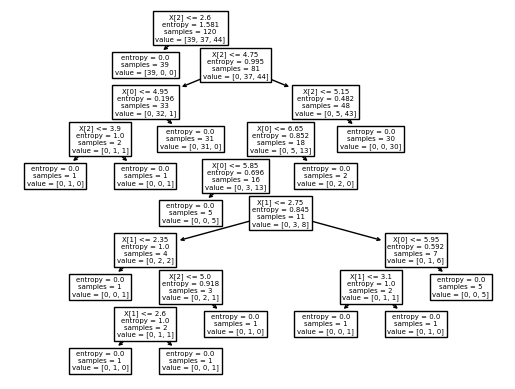

In [66]:
# your code here
import dtreeviz
df_iris2 = pd.read_csv('iris_teach_2.csv')
df_iris2.dropna(inplace=True)

X2 = df_iris2.drop('iris_name', axis=1).drop('petal width (cm)', axis=1)
y2 = df_iris2['iris_name']

iris_label_encoder = LabelEncoder().fit(y2).transform(y2)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, iris_label_encoder, test_size=0.2, random_state=1)

tree_clf2 = DecisionTreeClassifier(criterion='entropy', random_state=42)
tree_clf2.fit(X_train2, y_train2)

plot_tree(tree_clf2)

Accuracy: 0.93
Best hyperparameters: {'max_depth': 2}
Accuracy: 0.93


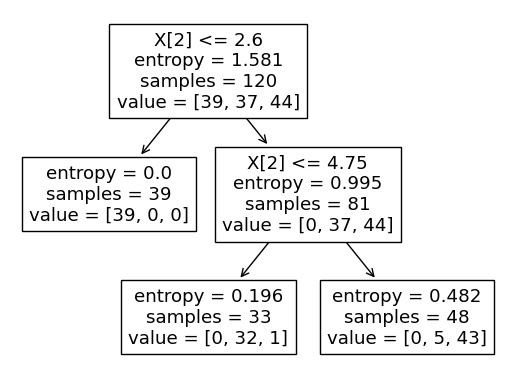

In [68]:
#Find the proper depth and evaluate the score for the decision tree
y_pred2= tree_clf2.predict(X_test2)
accuracy2 = accuracy_score(y_test2, y_pred2)
print("Accuracy: {:.2f}".format(accuracy2))

param_grid2 = {"max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]}
grid_search2 = GridSearchCV(tree_clf2, param_grid2, cv=5)
grid_search2.fit(X_train2, y_train2)
print("Best hyperparameters:", grid_search2.best_params_)

tree_clf_tuned2 = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)
tree_clf_tuned2.fit(X_train2, y_train2)

plot_tree(tree_clf_tuned2)

y_pred_tuned = tree_clf_tuned2.predict(X_test2)
accuracy_tuned = accuracy_score(y_test2, y_pred2)
print("Accuracy: {:.2f}".format(accuracy_tuned))